In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import LabelEncoder,LabelBinarizer,StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import keras
import keras.backend as kb
import tensorflow as tf

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

from math import sqrt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor




from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train=pd.read_csv('/content/drive/MyDrive/SUMMER ANALYTICS IITG/Hackathon/Train_Data.csv',parse_dates=[0])
test=pd.read_csv('/content/drive/MyDrive/SUMMER ANALYTICS IITG/Hackathon/Test_Data.csv',parse_dates=[0])

In [ ]:
train.head(46)

In [6]:
train.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4571 non-null   datetime64[ns]
 1   campaign     4571 non-null   object        
 2   adgroup      4571 non-null   object        
 3   ad           4571 non-null   object        
 4   impressions  4571 non-null   int64         
 5   clicks       4571 non-null   int64         
 6   cost         4571 non-null   float64       
 7   conversions  4571 non-null   int64         
 8   revenue      4571 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 321.5+ KB


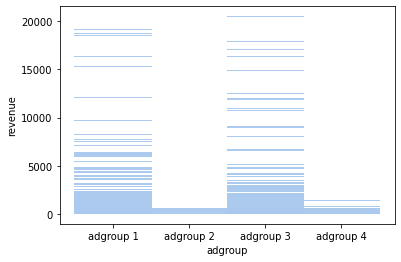

In [8]:
sns.histplot(x = 'adgroup' , y = 'revenue',  data = train)

In [9]:
train['ci'] = (train.clicks)/(train.impressions)

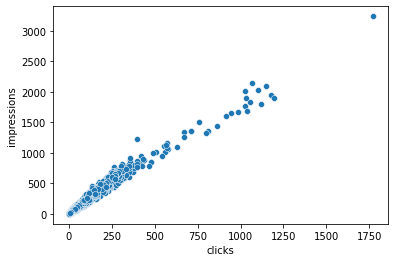

In [10]:
sns.scatterplot(x = train['clicks'] , y= train['impressions'] , data = train)

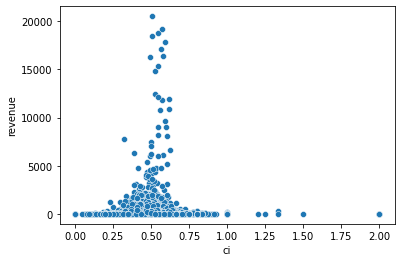

In [11]:
sns.scatterplot(x = train['ci'] , y = train['revenue'] , data= train)

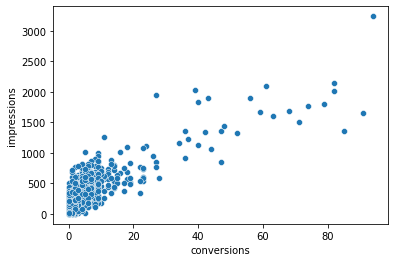

In [12]:
sns.scatterplot(x = train['conversions'] , y = train['impressions'] , data = train)

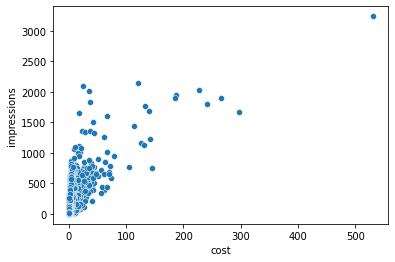

In [13]:
sns.scatterplot(x = train['cost'] , y = train['impressions'] , data = train)

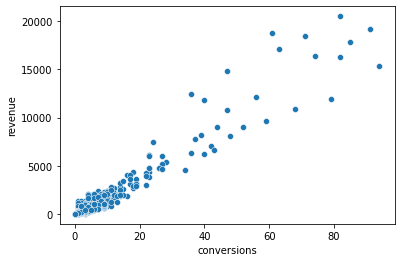

In [14]:
sns.scatterplot(x = train['conversions'] , y = train['revenue'] , data = train)

In [15]:
train['date'] = pd.to_datetime(train['date'])
train['weekday'] = train['date'].dt.dayofweek
train = train.drop(['campaign'] , axis = 1)
train = train.drop(['date'] , axis = 1)
train = train.drop(['clicks'] , axis = 1)

In [16]:
train.head()

,adgroup,ad,impressions,cost,conversions,revenue,ci,weekday
0,adgroup 1,ad 1,24,0.08,0,0.00,0.250000,2
1,adgroup 2,ad 1,1,0.00,0,0.00,0.000000,2
2,adgroup 3,ad 1,13,0.04,0,0.00,0.307692,2
3,adgroup 4,ad 1,5,0.08,0,0.00,0.800000,2
4,adgroup 1,ad 2,247,1.29,4,925.71,0.510121,2


In [17]:
test = test.drop(['campaign'] , axis = 1)
test['weekday'] = test['date'].dt.weekday
test = test.drop(['date'] , axis =1)
test['ci'] = (test.clicks)/(test.impressions)
test = test.drop(['clicks'] , axis = 1)
test.head()

,adgroup,ad,cost,impressions,conversions,weekday,ci
0,adgroup 1,ad 1,0.58,121,1,6,0.404959
1,adgroup 3,ad 1,0.17,22,0,6,0.545455
2,adgroup 4,ad 1,0.05,5,0,6,0.600000
3,adgroup 2,ad 1,0.01,2,0,6,0.500000
4,adgroup 2,ad 2,0.01,3,0,6,0.333333


In [18]:
dfc = train.append(test) 

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dfc['Ad'] = le.fit_transform(dfc['ad'])
dfc['Adgroup'] = le.fit_transform(dfc['adgroup'])
dfc = dfc.drop(['ad' , 'adgroup'] , axis = 1)
X_train = dfc.iloc[:-318]
X_test = dfc.iloc[4571:]

In [20]:
X_test.head()

,impressions,cost,conversions,revenue,ci,weekday,Ad,Adgroup
0,121,0.58,1,NaN,0.404959,6,0,0
1,22,0.17,0,NaN,0.545455,6,0,2
2,5,0.05,0,NaN,0.600000,6,0,3
3,2,0.01,0,NaN,0.500000,6,0,1
4,3,0.01,0,NaN,0.333333,6,11,1


In [21]:
X_train.head()

,impressions,cost,conversions,revenue,ci,weekday,Ad,Adgroup
0,24,0.08,0,0.00,0.250000,2,0,0
1,1,0.00,0,0.00,0.000000,2,0,1
2,13,0.04,0,0.00,0.307692,2,0,2
3,5,0.08,0,0.00,0.800000,2,0,3
4,247,1.29,4,925.71,0.510121,2,11,0


In [22]:
y = X_train['revenue']
X_train = X_train.drop(['revenue'] , axis = 1)
X_test = X_test.drop(['revenue'] , axis = 1)

In [23]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
model = XGBRegressor()



parameters = {'nthread':[4], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}


xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)
xgb_grid.fit(X_train,y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:   20.3s finished


GridSearchCV(cv=2, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_...
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'm

In [24]:
submission = pd.DataFrame({ 'revenue' : xgb_grid.predict(X_test) })
submission.to_csv("my_submission11.csv", index=False)